## How To Break Into The Tech Field
The analysis on this project aims to take a closer look into the Stack OverFlow data and evaluate how the data answers questions that might help newbies interested in tech to take a leap

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import HowToBreakIntoTheField as t
%matplotlib inline

In [2]:
df = pd.read_csv('stackoverflow_data/survey-results-public.csv')
schema = pd.read_csv('stackoverflow_data/survey-results-schema.csv')

df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1
1. In order to understand how to break into the fieldd, we would look at the cousinEducation fild. Use the schema dataset to answer this question. Write a function called get_description that takes the schema dataframe and the column as a string, and return aa string of the description for thaat column.

In [19]:
'''
For learning purposes, I will break down the steps below
schema['Column'] - returns the information in the column named 'Column'
                this is a series and not a dataframe and the name 'Column' is just the index name it could be anything else.
schema['Column'] == 'Respondent' - returns a series of booleans where 
                the value is True if the value in the column 'Column' is equal to 'Respondent'
schema[schema['Column'] == 'Respondent'] - returns a dataframe where the 
                value in the column 'Column' is equal to 'Respondent'
schema[schema['Column'] == 'Respondent']['Question'] - returns a series of 
                the values in the column 'Question' where the value in the column 'Column' is equal to 'Respondent'
schema[schema['Column'] == 'Respondent']['Question'].values - returns a 
                numpy array of the values in the series

'''
schema[schema['Column'] == 'Respondent']['Question'].values[0]

'Respondent ID number'

In [21]:
def get_description(column, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column - string - the column name you would like to know about

    OUTPUT - desc - string - the description of the column 
    '''

    desc = schema[schema['Column'] == column]['Question'].values[0]
    return desc

In [28]:
print(get_description('CousinEducation'))
print('-----------------------------===================---------------------')
print(get_description(df.columns[3]))

#The above shows two different ways to see pass in the columns name to the function. The first is just a string and the second is the third column name in the dataframe.

Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?
Let's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?
Let's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which of 

In [34]:
description = set(get_description(col) for col in df.columns)
# The code above allows us to see all of the column names in the dataframe. This is a great way to get a feel for the data you are working with.



### Question 2
2. Provide a pandas series of the different **CousinEducation** status values in the dataset.Sstore this pandas series in **cous_ed_vals**. 

In [36]:
cous_ed_vals = df['CousinEducation'].value_counts()
cous_ed_vals

CousinEducation
Take online courses; Buy books and work through the exercises                                         711
Take online courses                                                                                   551
None of these                                                                                         523
Take online courses; Part-time/evening courses; Buy books and work through the exercises              479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises    465
                                                                                                     ... 
Master's degree; Contribute to open source; Part-time/evening courses; Participate in hackathons        1
Return to college; Participate in online coding competitions; Conferences/meet-ups; Other               1
Return to college; Get a job as a QA tester; Participate in hackathons; Other                           1
Return to college; Participate

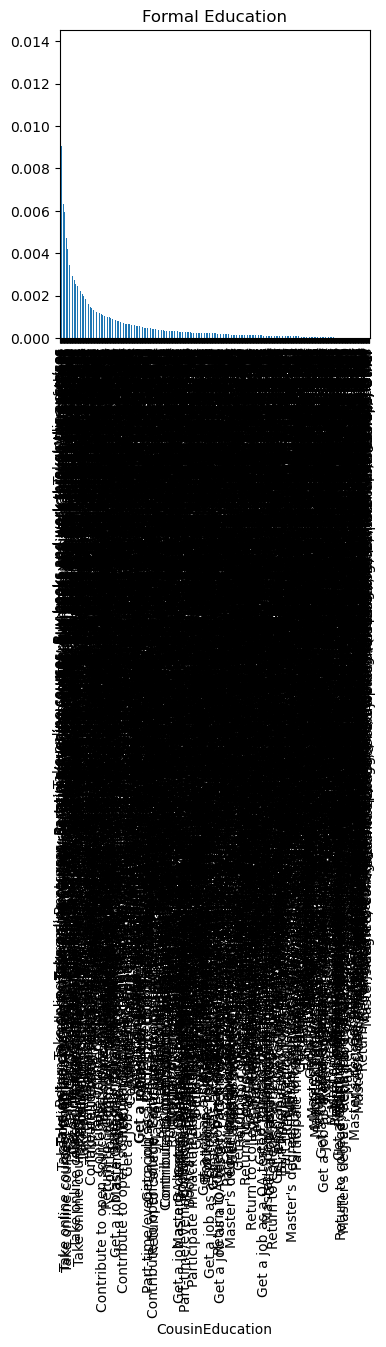

In [44]:
(cous_ed_vals/df.shape[0]).plot(kind='bar',figsize=(4,4));
plt.title('Formal Education');


The information in the chart doesnt look readable hence not the best representation of the data. So lets clean it up

In [ ]:
# This line of code is just to see what the values look like for the column 'CousinEducation'. This is a great way to get a feel for the data you are working with. The notebook would be a lot cleaner if I didn't include all of the print statements, but I wanted to show you how I was thinking about the data as I was working through it.
for i in df['CousinEducation'].dropna():
    print(i)
    print('---------------------===================---------------------')

In [125]:
from collections import defaultdict

possible_vals = ["Take online courses", "Buy books and work through the exercises", "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

studyaf = df['CousinEducation'].value_counts().reset_index()
studyaf.rename(columns={'CousinEducation':'method','count':'count'},inplace=True)
# t.total_count(studyaf,'method','count',possible_vals)
studyaf

datapoints_length = studyaf.shape[0]
study_df = defaultdict(int)

for val in possible_vals:
    for idx in range(datapoints_length):
        if val in studyaf['method'][idx]:
            study_df[val] += studyaf['count'][idx]

study_df = pd.DataFrame(pd.Series(study_df).reset_index())
study_df.columns = ['method','count']
study_df.sort_values('count',ascending=False,inplace=True)
study_df

,method,count
0,Take online courses,15246
1,Buy books and work through the exercises,11750
3,Part-time/evening courses,7517
5,Contribute to open source,7423
7,Bootcamp,5276
6,Conferences/meet-ups,5244
4,Return to college,5017
9,Participate in online coding competitions,3610
8,Get a job as a QA tester,3376
11,Participate in hackathons,2747


In [140]:
study_df['count_scaled'] = study_df['count']/study_df['count'].sum()
study_df

,method,count,count_scaled
0,Take online courses,15246,0.209432
1,Buy books and work through the exercises,11750,0.161408
3,Part-time/evening courses,7517,0.103260
5,Contribute to open source,7423,0.101968
7,Bootcamp,5276,0.072476
6,Conferences/meet-ups,5244,0.072036
4,Return to college,5017,0.068918
9,Participate in online coding competitions,3610,0.049590
8,Get a job as a QA tester,3376,0.046376
11,Participate in hackathons,2747,0.037735


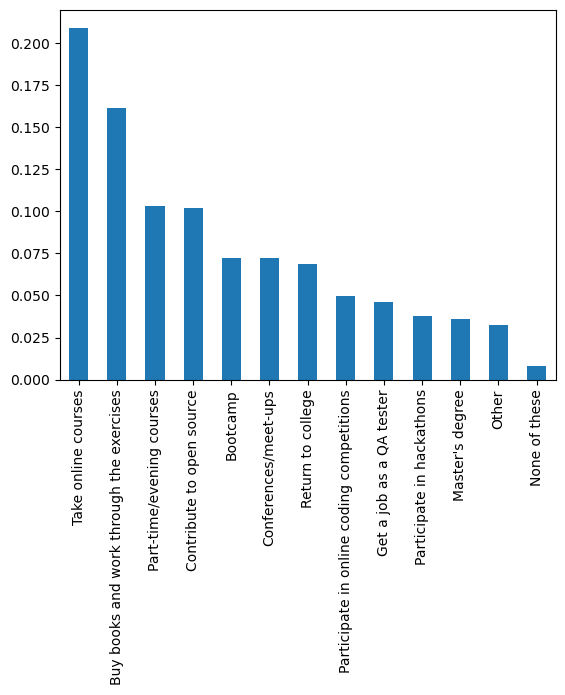

In [155]:
(study_df['count']/study_df['count'].sum()).plot(kind='bar')
labels = list(study_df['method'])
plt.xticks(range(len(labels)),labels,rotation=90);
